<a href="https://colab.research.google.com/github/PRAN20/Color-Feature-Extraction/blob/main/K_Mean_Color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Header Files**

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

%matplotlib inline

# **Importing DataBase**

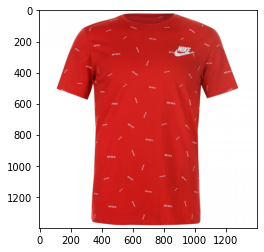

In [2]:
image = cv2.imread('/content/1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# **Color Identification**

In [3]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [4]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [7]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    plt.savefig("Result.png")
    return rgb_colors

[array([232.39336918, 202.49014337, 202.05197133]),
 array([205.99101012,  31.7626792 ,  29.11266715]),
 array([217.31429898, 130.58170845, 132.62999071]),
 array([188.04305171,  29.62393636,  26.09326263]),
 array([140.90275674,  20.42320509,  18.81520751]),
 array([191.49721469,  46.41365553,  42.5511894 ]),
 array([198.70066174,  82.06811989,  81.87582717]),
 array([254.76299882, 254.72565484, 254.68635066])]

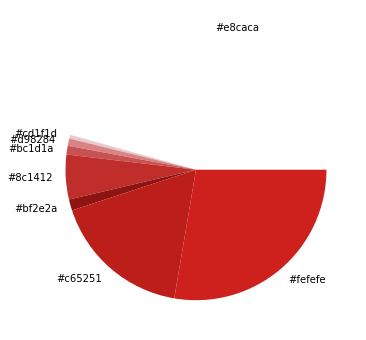

In [8]:
get_colors(get_image('/content/1.jpg'), 8, True)